In [36]:
import pandas as pd
import string
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Đọc dữ liệu từ file CSV
file_path = "data\data.csv"
data = pd.read_csv(file_path)

In [38]:
# Kiểm tra phân phối chủ đề
topic_counts = data['Topic'].value_counts()
print("Topic distribution:")
print(topic_counts)

Topic distribution:
Topic
Thời sự         2000
Thế giới        2000
Kinh doanh      2000
Bất động sản    2000
Khoa học        2000
Giải trí        2000
Thể thao        2000
Pháp luật       2000
Giáo dục        2000
Sức khỏe        2000
Đời sống        2000
Du lịch         2000
Số hóa          2000
Ôtô - Xe máy    2000
Ý kiến          2000
Name: count, dtype: int64


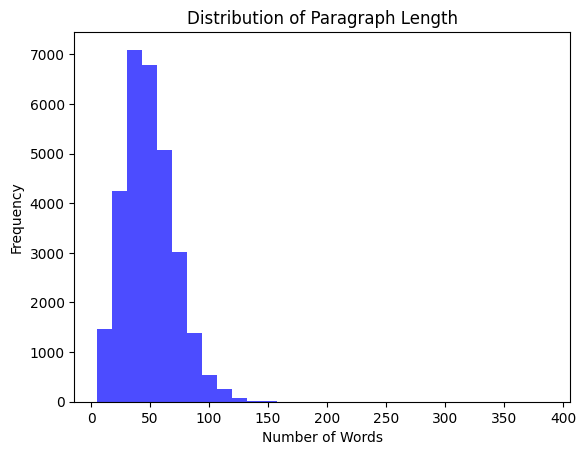

In [39]:
# Thống kê độ dài văn bản
data['Word_Count'] = data['Paragraph'].apply(lambda x: len(word_tokenize(x, format="text").split()))
plt.hist(data['Word_Count'], bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Paragraph Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [40]:
# Chuẩn hóa văn bản
vietnamese_stopwords = set([
    "là", "của", "và", "có", "với", "cho", "để", "nhưng", "rất", "vì",
    "đã", "này", "ra", "nhiều", "trong", "lại", "còn", "khi", "ở", "như",
    "cũng", "một", "năm", "tôi", "không", "được", "về", "thì", "nên", "này"
])

In [41]:
data['Cleaned_Paragraph'] = data['Paragraph'].str.translate(
    str.maketrans('', '', string.punctuation)
).str.lower()
data['Cleaned_Paragraph'] = data['Cleaned_Paragraph'].apply(
    lambda x: " ".join(
        [word for word in word_tokenize(x, format="text").split() if word not in vietnamese_stopwords]
    )
)

In [ ]:
# Mã hóa nhãn chủ đề
label_encoder = LabelEncoder()
data['Encoded_Topic'] = label_encoder.fit_transform(data['Topic'])
print("Encoded topics:")
print(label_encoder.classes_)

In [42]:
# Hiển thị kết quả phân tích
for topic, info in summary.items():
    print(f"\nTopic: {topic}")
    print(f"Number of paragraphs: {info['count']}")
    print(f"Most common words: {info['most_common_words']}")


Topic: Thời sự
Number of paragraphs: 2000
Most common words: [('các', 1157), ('từ', 471), ('đến', 441), ('theo', 390), ('bộ', 369), ('dự_án', 357), ('ông', 347), ('người', 345), ('sẽ', 345), ('trên', 338)]

Topic: Thế giới
Number of paragraphs: 2000
Most common words: [('các', 1004), ('ông', 957), ('tổng_thống', 580), ('người', 564), ('vào', 483), ('những', 433), ('tại', 396), ('sau', 394), ('từ', 392), ('sẽ', 382)]

Topic: Kinh doanh
Number of paragraphs: 2000
Most common words: [('các', 1305), ('từ', 623), ('tại', 583), ('ông', 528), ('hơn', 469), ('tỷ', 449), ('theo', 440), ('đến', 435), ('tăng', 420), ('vào', 400)]

Topic: Bất động sản
Number of paragraphs: 2000
Most common words: [('các', 1065), ('dự_án', 781), ('nhà', 721), ('tại', 709), ('khu', 621), ('đến', 610), ('đất', 609), ('từ', 514), ('đồng', 502), ('đầu_tư', 488)]

Topic: Khoa học
Number of paragraphs: 2000
Most common words: [('các', 1448), ('từ', 695), ('những', 668), ('trên', 614), ('hơn', 565), ('vào', 548), ('có_th